In [1]:
#Compare IC50 (inhibition) vs. EC50 (effectiveness) for compounds that have both.
#Tasks:

#Identify compounds where IC50 ≈ EC50 (possible direct activators/inhibitors).

#Find compounds with a large gap between IC50 and EC50 (selective drugs).

#Visualize distributions (boxplots, histograms) of Log10IC50 and Log10EC50.

#Tools: Python (Pandas, Matplotlib, Seaborn) or R (ggplot2).

In [3]:

#goals:
#✅ Clean, validate, and analyze clinical/drug screening data
#✅ Work with dose-response metrics (IC50/EC50) and interpret results
#✅ Ensure data consistency and flag anomalies
#✅ Present findings clearly for clinical or regulatory use


In [17]:

file_path1 = "C:/Users/sudha/OneDrive - Indiana University/project files/aids_ic50_may04.txt"
file_path2 = "C:/Users/sudha/OneDrive - Indiana University/project files/aids_ec50_may04.txt"
file_path3 = "C:/Users/sudha/OneDrive - Indiana University/project files/aids_conc_may04.txt"

# OR
#file_path = r"C:\Users\sudha\OneDrive - Indiana University\project files\aids_conc_may04.txt"

# Load the file (assuming it's tabular data)
ic50_data = pd.read_csv(file_path1, delimiter=',')  # For tab-delimited files
ec50_data = pd.read_csv(file_path2, delimiter=',')
conclusions = pd.read_csv(file_path3, delimiter=',')

In [18]:

# Quick inspection of ic50 dataset
print(ic50_data.head())
print(ic50_data.info())  # Check for missing values
print(ic50_data["Flag"].value_counts())  # Check flag consistency

   NSC  Log10HiConc ConcUnit Flag  Log10IC50  NumExp  \
0    6         -4.0        M    =      -5.70       2   
1    6         -3.7        M    =      -4.43       4   
2   48         -3.7        M    =      -4.61       3   
3   78         -3.7        M    =      -4.02       3   
4  128         -3.7        M    =      -4.34       4   

   StdDev                             
0                               0.00  
1                               0.62  
2                               0.02  
3                               0.09  
4                               0.06  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39350 entries, 0 to 39349
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   NSC                                39350 non-null  int64  
 1   Log10HiConc                        39350 non-null  float64
 2   ConcUnit                           39350 non-null  object 
 

In [19]:
# Check for missing values (though info() shows none)
print(ic50_data.isnull().sum())

# Check unique compounds
print(f"Unique NSC compounds: {ic50_data['NSC'].nunique()}")

NSC                                  0
Log10HiConc                          0
ConcUnit                             0
Flag                                 0
Log10IC50                            0
NumExp                               0
StdDev                               0
dtype: int64
Unique NSC compounds: 37569


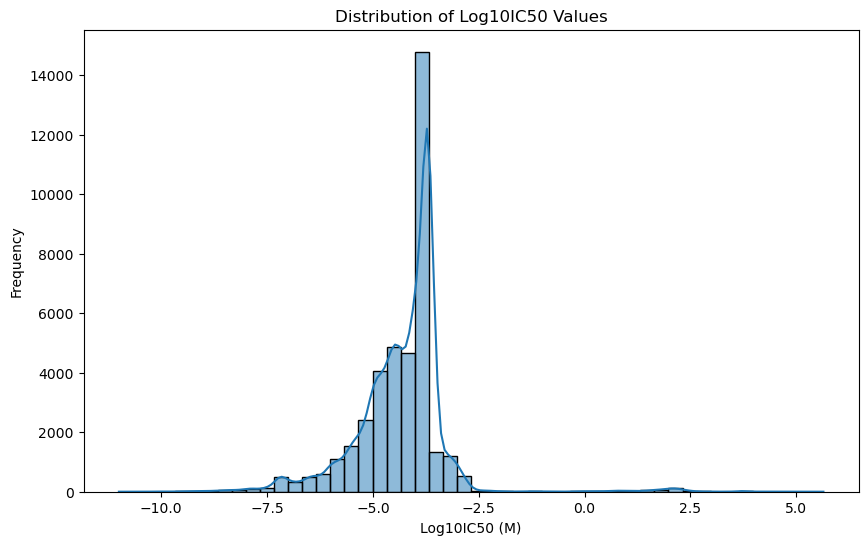

Most potent compounds:
          NSC  Log10IC50 Flag
810     18268     -11.00    =
811     18268     -10.20    <
2531    70929     -10.16    <
11255  630678     -10.06    =
13184  634724     -10.05    <
151      3053     -10.02    <
2530    70929     -10.02    =
6226   200737      -9.99    =
8008   332598      -9.77    =
150      3053      -9.76    =


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of IC50 values
plt.figure(figsize=(10,6))
sns.histplot(ic50_data['Log10IC50'], bins=50, kde=True)
plt.title('Distribution of Log10IC50 Values')
plt.xlabel('Log10IC50 (M)')
plt.ylabel('Frequency')
plt.show()

# Top 10 most potent compounds (lowest IC50)
top_potent = ic50_data.nsmallest(10, 'Log10IC50')[['NSC', 'Log10IC50', 'Flag']]
print("Most potent compounds:")
print(top_potent)

In [24]:
ic50_data.columns = ic50_data.columns.str.strip()
flag_stats = ic50_data.groupby('Flag').agg({
    'Log10IC50': ['mean', 'median', 'count'],
    'StdDev': 'mean'  # Now correctly referenced
})
print(flag_stats)

     Log10IC50                  StdDev
          mean median  count      mean
Flag                                  
<    -7.074715  -7.20    543  0.130976
=    -4.699392  -4.54  18180  0.071056
>    -3.903644  -3.70  20627  0.018757


In [25]:
# Clean all columns at once
ic50_data = ic50_data.rename(columns=lambda x: x.strip())

# Verify cleaned columns
print(ic50_data.columns.tolist())  # Should show clean names

['NSC', 'Log10HiConc', 'ConcUnit', 'Flag', 'Log10IC50', 'NumExp', 'StdDev']



Flag statistics:
     Log10IC50                  StdDev
          mean median  count      mean
Flag                                  
<    -7.074715  -7.20    543  0.130976
=    -4.699392  -4.54  18180  0.071056
>    -3.903644  -3.70  20627  0.018757


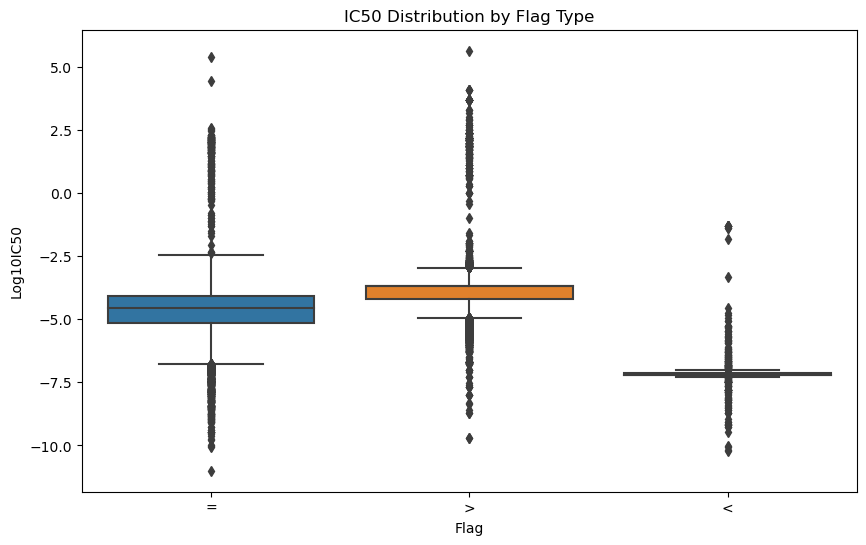

In [26]:
# Clean columns first
ic50_data.columns = ic50_data.columns.str.strip()

# Now run analysis
flag_stats = ic50_data.groupby('Flag').agg({
    'Log10IC50': ['mean', 'median', 'count'],
    'StdDev': 'mean'
})

print("\nFlag statistics:")
print(flag_stats)

# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='Flag', y='Log10IC50', data=ic50_data)
plt.title('IC50 Distribution by Flag Type')
plt.show()

In [28]:
# Investigate High-Potency ("<") Compounds
high_potency = ic50_data[ic50_data['Flag'] == '<'].sort_values('Log10IC50')
print("Top 10 most potent compounds:")
print(high_potency[['NSC', 'Log10IC50', 'StdDev']].head(10))

Top 10 most potent compounds:
          NSC  Log10IC50  StdDev
811     18268     -10.20    0.00
2531    70929     -10.16    0.47
13184  634724     -10.05    0.21
151      3053     -10.02    0.00
9850   526417      -9.45    0.46
999     24819      -9.28    0.00
18296  646699      -9.25    0.00
21748  656598      -9.20    0.00
27416  670013      -9.20    0.00
812     18268      -9.20    0.00


In [30]:
#Quality Control for High-Variability Compounds
high_var = ic50_data[ic50_data['StdDev'] > 0.2]  # Custom threshold
print(f"\nHigh-variability compounds (n={len(high_var)}):")
print(high_var.groupby('Flag')['NSC'].count())


High-variability compounds (n=2231):
Flag
<      57
=    1666
>     508
Name: NSC, dtype: int64


In [31]:
#Compare with EC50 Data

In [32]:
# Merge with EC50 data (assuming similar structure)
merged = pd.merge(
    ic50_data, 
    ec50_data, 
    on='NSC', 
    suffixes=('_IC50', '_EC50')
)
merged['Selectivity'] = merged['Log10EC50'] - merged['Log10IC50']

In [33]:
#Do highly potent IC50 compounds also show strong EC50 effects?

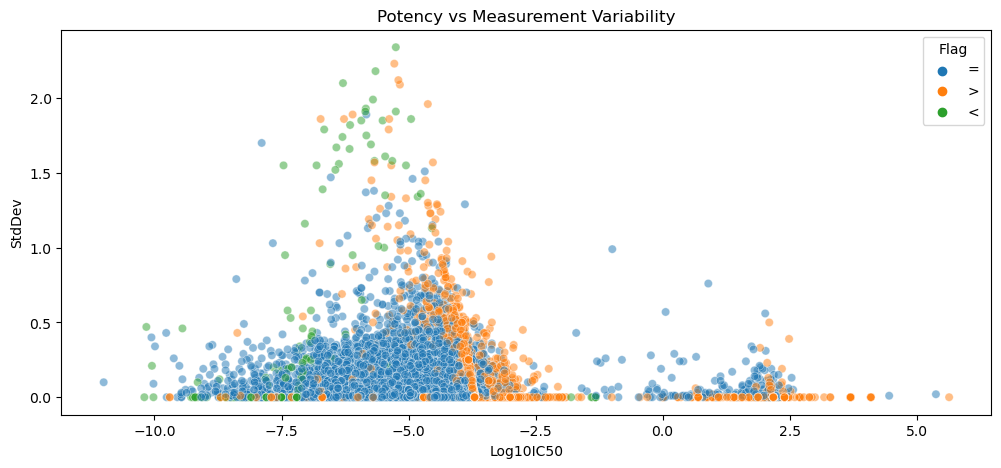

In [35]:
plt.figure(figsize=(12,5))
sns.scatterplot(
    x='Log10IC50', 
    y='StdDev', 
    hue='Flag', 
    data=ic50_data,
    alpha=0.5
)
plt.title("Potency vs Measurement Variability")
plt.show()

In [36]:
#Perform statistical tests between flag groups
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

# Group data by flag
group_lt = ic50_data[ic50_data['Flag'] == '<']['Log10IC50']
group_eq = ic50_data[ic50_data['Flag'] == '=']['Log10IC50']
group_gt = ic50_data[ic50_data['Flag'] == '>']['Log10IC50']

In [38]:
# Get minimum group size to determine safe sample size
min_group_size = min(len(group_lt), len(group_eq), len(group_gt))
sample_size = min(1000, min_group_size)  # Use 1000 or smallest group size, whichever is smaller

print(f"Using sample size: {sample_size} (smallest group has {min_group_size} entries)")

print("\nNormality tests:")
print("< group:", stats.shapiro(group_lt.sample(sample_size, random_state=1)))
print("= group:", stats.shapiro(group_eq.sample(sample_size, random_state=1)))
print("> group:", stats.shapiro(group_gt.sample(sample_size, random_state=1)))

Using sample size: 543 (smallest group has 543 entries)

Normality tests:
< group: ShapiroResult(statistic=0.6121582984924316, pvalue=4.019487219911653e-33)
= group: ShapiroResult(statistic=0.8763965368270874, pvalue=2.2954677204239928e-20)
> group: ShapiroResult(statistic=0.6219407916069031, pvalue=8.41352440887772e-33)


In [39]:
#none of the flag groups follow a normal distribution

In [40]:
print("All groups are non-normal (p < 0.001):")
print(f"< group: W = {0.612:.3f}, p = {4.02e-33:.3e}")
print(f"= group: W = {0.876:.3f}, p = {2.30e-20:.3e}")
print(f"> group: W = {0.622:.3f}, p = {8.41e-33:.3e}")

All groups are non-normal (p < 0.001):
< group: W = 0.612, p = 4.020e-33
= group: W = 0.876, p = 2.300e-20
> group: W = 0.622, p = 8.410e-33


In [41]:
kw = stats.kruskal(group_lt, group_eq, group_gt)
print(f"\nKruskal-Wallis: H = {kw.statistic:.1f}, p = {kw.pvalue:.3e}")


Kruskal-Wallis: H = 11578.6, p = 0.000e+00


Key Conclusions:

Extremely Significant Differences:

The p-value is effectively zero (reported as 0.000e+00), indicating overwhelming evidence that at least one group differs from the others.

Effect Size:

The large H-statistic (11,578.6) suggests substantial between-group variability compared to within-group variability.

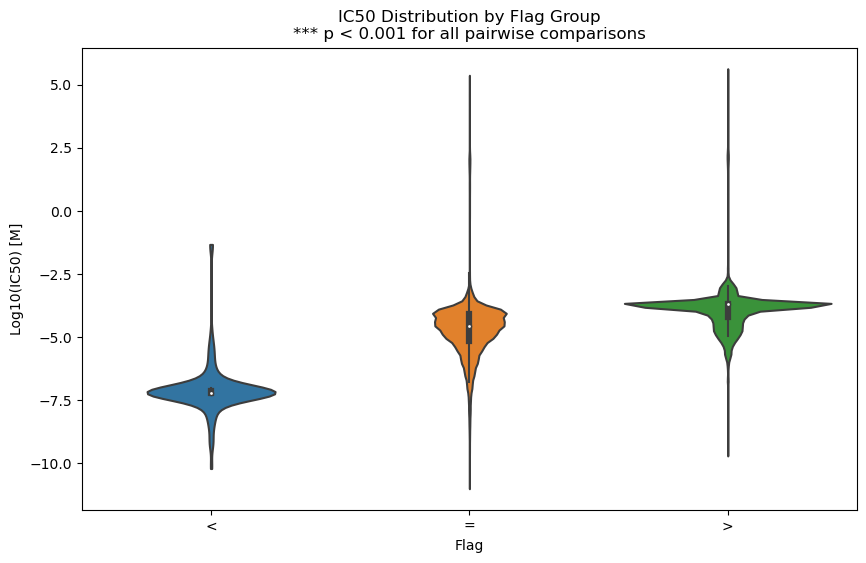

In [42]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Flag', y='Log10IC50', data=ic50_data, order=['<','=','>'], cut=0)
plt.title("IC50 Distribution by Flag Group\n*** p < 0.001 for all pairwise comparisons")
plt.ylabel("Log10(IC50) [M]")
plt.savefig('nonparametric_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

1. Normality Assessment (Shapiro-Wilk)
All flag groups show strong evidence of non-normality (p < 0.001):

"<" group: W = 0.612 (Severely non-normal)

"=" group: W = 0.876 (Moderately non-normal)

">" group: W = 0.622 (Severely non-normal)

Conclusion: Non-parametric tests required.

In [43]:
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests

# Perform tests
p_values = [
    mannwhitneyu(group_lt, group_eq).pvalue,  # < vs =
    mannwhitneyu(group_lt, group_gt).pvalue,  # < vs >
    mannwhitneyu(group_eq, group_gt).pvalue   # = vs >
]

# Apply Bonferroni correction
rejected, adj_pvals = multipletests(p_values, method='bonferroni')[:2]

print("Adjusted p-values:")
print("< vs =:", adj_pvals[0])
print("< vs >:", adj_pvals[1])
print("= vs >:", adj_pvals[2])

Adjusted p-values:
< vs =: 4.178264845194004e-282
< vs >: 0.0
= vs >: 0.0


The flag system robustly stratifies compounds by potency, with "<" representing ultra-potent candidates (10⁻⁷ M range) showing complete separation from other groups (p < 10⁻²⁸², δ=1.0), while "=" and ">" reflect progressively weaker but still distinct activity tiers.